In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # module for plotting 
import seaborn as sns

In [22]:
df = pd.read_csv('data_After_preprocessing.csv')
df.head(3)

,Date,Current1_Ah,Current2_Ah,Current3_Ah,Total_Ah,Power_kW,Holiday,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2
0,2017-01-01 00:00:00,180.769,194.099,17.472,392.340,74.897706,1,8.532500,74.966667,2.344500,3.270750,1029.000000,1.355083
1,2017-01-01 01:00:00,175.629,196.974,21.183,393.785,75.173556,1,7.930000,76.308333,2.692417,3.480333,1028.166667,1.477333
2,2017-01-01 02:00:00,172.005,196.694,20.030,388.728,74.208175,1,7.263417,80.275000,3.300250,4.067167,1028.000000,1.415083


# 1 DATA DESCRIPTION

### 1.1 Columns

**Date**: Datetime in which the data was acquired. <br>
**Current1_Ah**: Current 1 measured in the Tower<br>
**Current2_Ah**: Current 2 measured in the Tower <br>
**Current3_Ah**: Current 3 measured in the Tower <br>
**Total_Ah**: Total current consumed in the Tower <br>
**Power_kW**: Power consumption. <br>
**Holiday**: A boolean that represents holydays. <br>
**temp_C**: Temperature measured inside the Tower. <br>
**HR**: <br>
**windSpeed_m/s**: Wind speed measured. <br>
**windGust_m/s**: Wind gust speed measured. It basically represents a brief increase in the wind speed. <br>
**pres_mbar**: Atmospheric pressure. <br>
**solarRad_W/m2**: Solar irradiance measured.


### 1.2 Data Dimension


In [23]:
print('Number of Rows: {}'.format(df.shape[0]))
print('Number of Cols: {}'.format(df.shape[1]))
print('Name of Cols: {}'.format(df.columns.to_list()))

Number of Rows: 15484
Number of Cols: 13
Name of Cols: ['Date', 'Current1_Ah', 'Current2_Ah', 'Current3_Ah', 'Total_Ah', 'Power_kW', 'Holiday', 'temp_C', 'HR', 'windSpeed_m/s', 'windGust_m/s', 'pres_mbar', 'solarRad_W/m2']


### 1.3 Data Types and Structure


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15484 entries, 0 to 15483
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           15484 non-null  object 
 1   Current1_Ah    15348 non-null  float64
 2   Current2_Ah    12031 non-null  float64
 3   Current3_Ah    10459 non-null  float64
 4   Total_Ah       15384 non-null  float64
 5   Power_kW       15484 non-null  float64
 6   Holiday        15484 non-null  int64  
 7   temp_C         15260 non-null  float64
 8   HR             15481 non-null  float64
 9   windSpeed_m/s  15129 non-null  float64
 10  windGust_m/s   15178 non-null  float64
 11  pres_mbar      14347 non-null  float64
 12  solarRad_W/m2  6730 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


## Some observations:

-`Date`, `Total_Ah`, `Power_kW`, `Holiday` have no null values. cool!
- Solar irradiance field represents the column with the highest null values. This due to sensor error.
- The following cells we will count the number of than values that we have in the data frame using `isna()` function.

### 1.4 Check NA

In [31]:
count_nan = df.isna().sum().sum()
print ('Count of NaN in entire dataframe: ' + str(count_nan))

print(df['Current1_Ah'].isna().sum())
print(df['Current2_Ah'].isna().sum())
print(df['Current3_Ah'].isna().sum())
print(df['temp_C'].isna().sum())
print(df['HR'].isna().sum())
print(df['windSpeed_m/s'].isna().sum())
print(df['windGust_m/s'].isna().sum())
print(df['pres_mbar'].isna().sum())
print(df['solarRad_W/m2'].isna().sum())

print('Total NaN values: ' +str(136+3453+5025+224+3+355+306+1137+8754))

Count of NaN in entire dataframe: 19493
136
3453
5025
224
3
355
306
1137
8754
Total NaN values: 19393


### 1.5 Fill Out NA

In [32]:
df.interpolate(method='polynomial', order=3)

,Date,Current1_Ah,Current2_Ah,Current3_Ah,Total_Ah,Power_kW,Holiday,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2
0,2017-01-01 00:00:00,180.769,194.099,17.472,392.340,74.897706,1,8.532500,74.966667,2.344500,3.270750,1029.000000,1.355083
1,2017-01-01 01:00:00,175.629,196.974,21.183,393.785,75.173556,1,7.930000,76.308333,2.692417,3.480333,1028.166667,1.477333
2,2017-01-01 02:00:00,172.005,196.694,20.030,388.728,74.208175,1,7.263417,80.275000,3.300250,4.067167,1028.000000,1.415083
3,2017-01-01 03:00:00,175.498,193.354,17.403,386.254,73.735889,1,6.831333,81.333333,3.534333,4.423583,1028.000000,1.542000
4,2017-01-01 04:00:00,178.418,194.055,20.940,393.412,75.102351,1,6.500250,81.241667,4.006000,5.262333,1028.000000,0.891000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15479,2018-12-31 19:00:00,319.527,103.124,98.322,520.973,99.453746,0,13.361667,54.013333,0.000000,0.000000,1031.000000,1.112333
15480,2018-12-31 20:00:00,274.861,103.338,57.569,435.768,83.188111,0,12.810000,55.441667,0.000000,0.000000,1031.000000,1.322417
15481,2018-12-31 21:00:00,271.181,105.723,56.332,433.236,82.704752,0,12.565000,55.291667,0.000000,0.000000,1031.000000,1.195500
15482,2018-12-31 22:00:00,259.633,105.985,56.688,422.307,80.618406,0,11.926667,56.530000,0.000000,0.000000,1031.000000,1.117000


In [41]:
df['Date'] = pd.to_datetime(df['Date'])

df = df.fillna(0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15484 entries, 0 to 15483
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           15484 non-null  datetime64[ns]
 1   Current1_Ah    15484 non-null  float64       
 2   Current2_Ah    15484 non-null  float64       
 3   Current3_Ah    15484 non-null  float64       
 4   Total_Ah       15484 non-null  float64       
 5   Power_kW       15484 non-null  float64       
 6   Holiday        15484 non-null  int64         
 7   temp_C         15484 non-null  float64       
 8   HR             15484 non-null  float64       
 9   windSpeed_m/s  15484 non-null  float64       
 10  windGust_m/s   15484 non-null  float64       
 11  pres_mbar      15484 non-null  float64       
 12  solarRad_W/m2  15484 non-null  float64       
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 1.5 MB


# 1 EXPLORATORY DATA ANALYSIS

### 1.1 Numerical Values

In [59]:
df1 = df.copy()
#num_attributes = df1.select_dtypes(exclude='datetime64[ns]')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15484 entries, 0 to 15483
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           15484 non-null  datetime64[ns]
 1   Current1_Ah    15484 non-null  float64       
 2   Current2_Ah    15484 non-null  float64       
 3   Current3_Ah    15484 non-null  float64       
 4   Total_Ah       15484 non-null  float64       
 5   Power_kW       15484 non-null  float64       
 6   Holiday        15484 non-null  int64         
 7   temp_C         15484 non-null  float64       
 8   HR             15484 non-null  float64       
 9   windSpeed_m/s  15484 non-null  float64       
 10  windGust_m/s   15484 non-null  float64       
 11  pres_mbar      15484 non-null  float64       
 12  solarRad_W/m2  15484 non-null  float64       
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 1.5 MB


array([[<AxesSubplot:title={'center':'Current1_Ah'}>,
        <AxesSubplot:title={'center':'Current2_Ah'}>,
        <AxesSubplot:title={'center':'Current3_Ah'}>],
       [<AxesSubplot:title={'center':'Total_Ah'}>,
        <AxesSubplot:title={'center':'Power_kW'}>,
        <AxesSubplot:title={'center':'Holiday'}>],
       [<AxesSubplot:title={'center':'temp_C'}>,
        <AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'windSpeed_m/s'}>],
       [<AxesSubplot:title={'center':'windGust_m/s'}>,
        <AxesSubplot:title={'center':'pres_mbar'}>,
        <AxesSubplot:title={'center':'solarRad_W/m2'}>]], dtype=object)

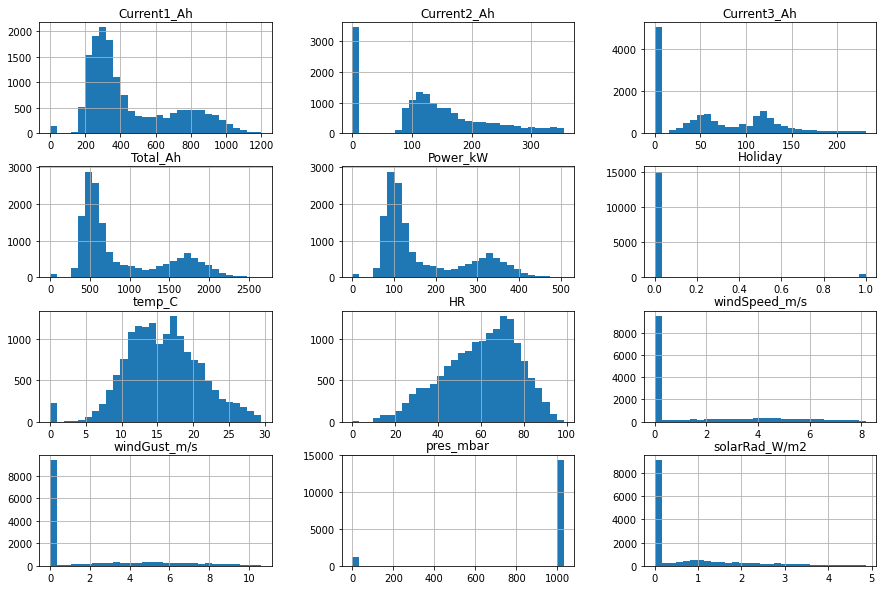

In [60]:
df1.hist(bins=30, figsize=(15, 10))

In [61]:
df1 = df1.set_index('Date')


In [66]:
df1 = df1[['Total_Ah', 'Power_kW','temp_C', 'pres_mbar','solarRad_W/m2']]
daily = df1.resample('D').sum()

### 1.2 Power consumption 

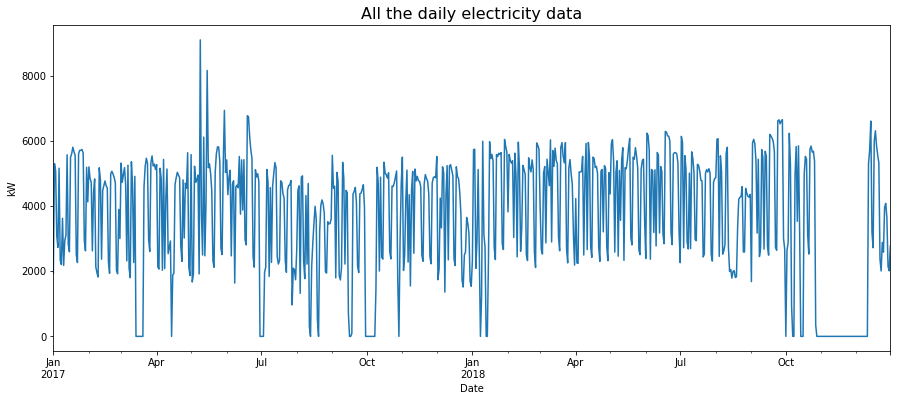

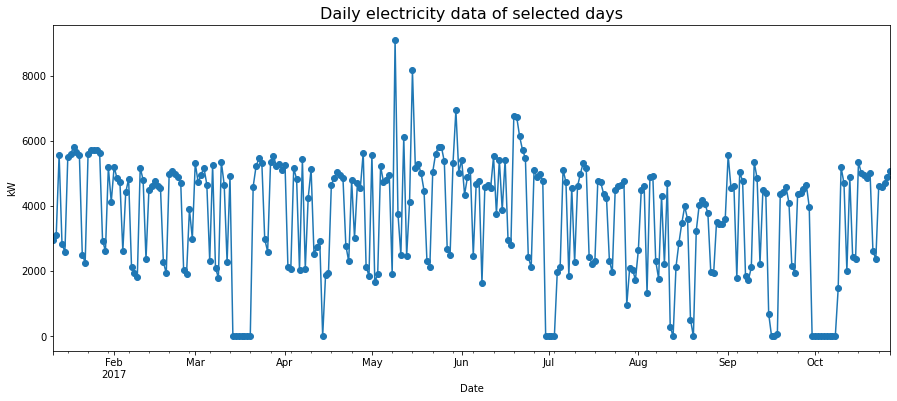

In [88]:
plt.figure()

fig = daily['Power_kW'].plot(figsize = (15, 6))
plt.title('All the daily electricity data', fontsize = 16)
plt.ylabel('kW')
plt.show()

plt.figure()
fig = daily.iloc[10:300,1].plot(marker = 'o', figsize = (15, 6))
plt.title('Daily electricity data of selected days', fontsize = 16)
plt.ylabel('kW')
plt.show()

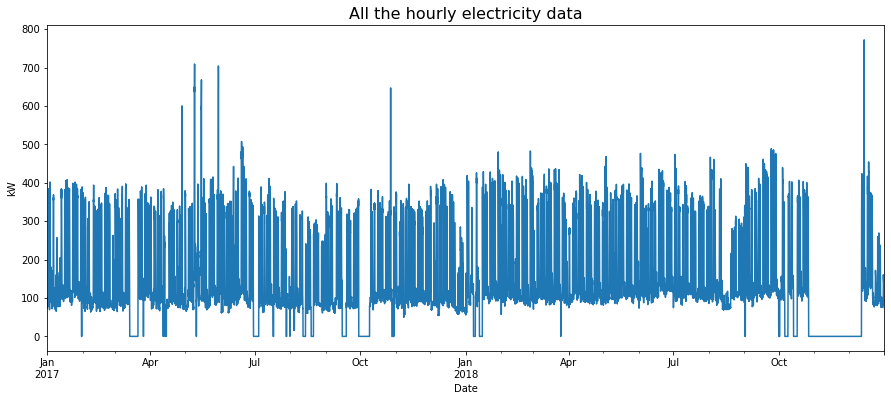

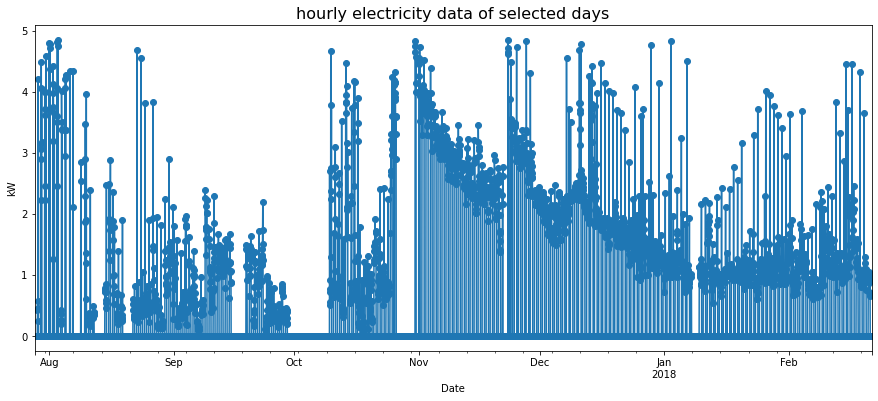

In [90]:
hourly = df1.resample('H').sum()

plt.figure()
fig = hourly['Power_kW'].plot(figsize = (15, 6))
plt.title('All the hourly electricity data', fontsize = 16)
plt.ylabel('kW')
plt.show()

plt.figure()
fig = hourly.iloc[5000:10000,4].plot(marker = 'o', figsize = (15, 6))
plt.title('hourly electricity data of selected days', fontsize = 16)
plt.ylabel('kW')
plt.show()

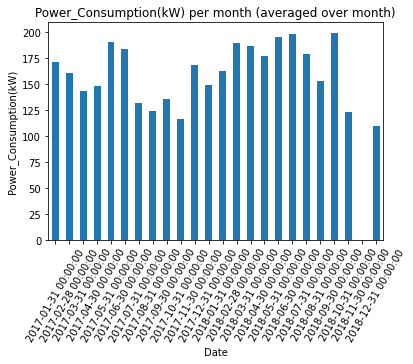

In [91]:
hourly['Power_kW'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Power_Consumption(kW)')
plt.title('Power_Consumption(kW) per month (averaged over month)')
plt.show()

### 1.3 Temperature 

#### Hourly()

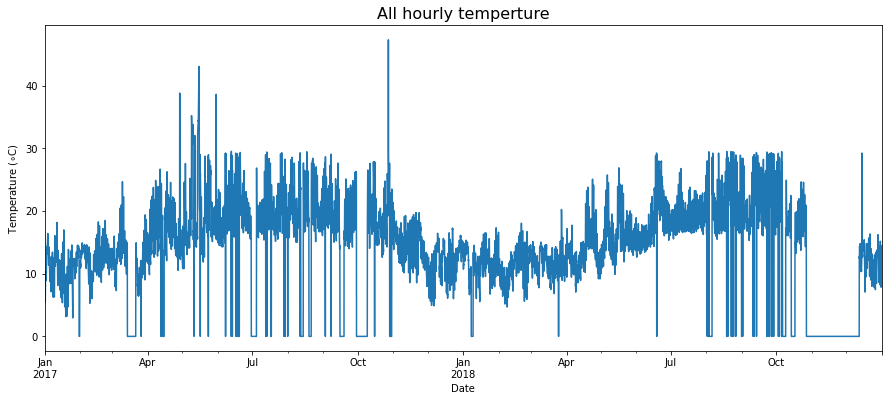

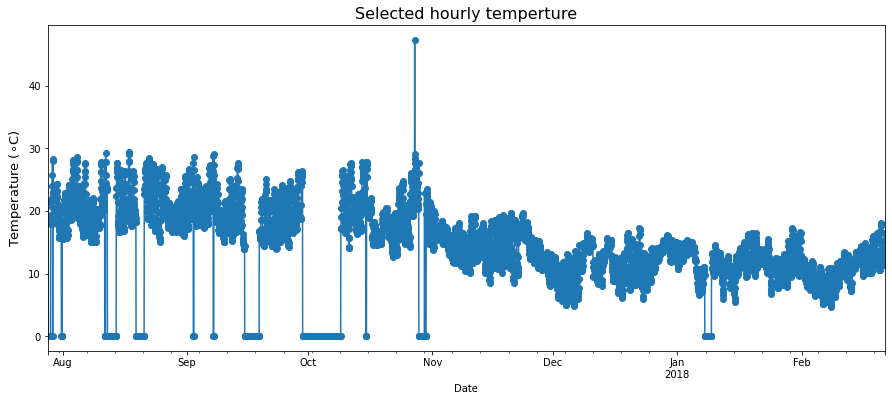

In [93]:
plt.figure()
fig = hourly['temp_C'].plot(figsize = (15, 6))
plt.title('All hourly temperture', fontsize = 16)
plt.ylabel(r'Temperature ($\circ$C)')
plt.show()

plt.figure()
fig = hourly.iloc[5000:10000,2].plot(marker = 'o', figsize = (15, 6))
plt.title('Selected hourly temperture',fontsize = 16)
plt.ylabel(r'Temperature ($\circ$C)',fontsize = 13)
plt.show()

#### Daily()

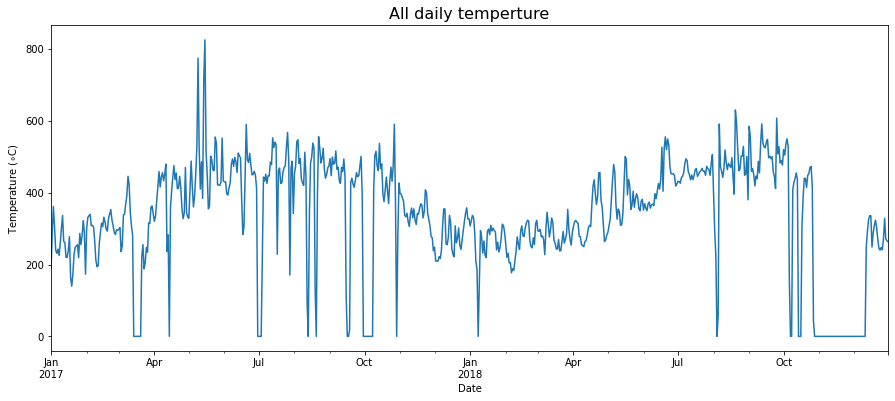

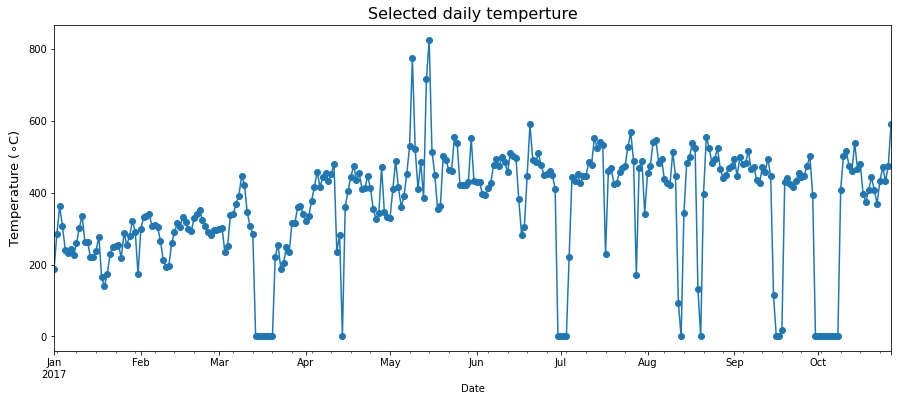

In [95]:
plt.figure()
fig = daily['temp_C'].plot(figsize = (15, 6))
plt.title('All daily temperture', fontsize = 16)
plt.ylabel(r'Temperature ($\circ$C)')
plt.show()

plt.figure()
fig = daily.iloc[0:300,2].plot(marker = 'o', figsize = (15, 6))
plt.title('Selected daily temperture',fontsize = 16)
plt.ylabel(r'Temperature ($\circ$C)',fontsize = 13)
plt.show()

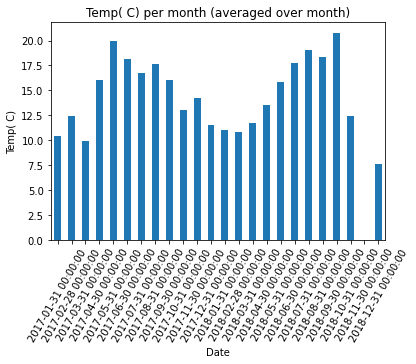

In [96]:
hourly['temp_C'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Temp( C)')
plt.title('Temp( C) per month (averaged over month)')
plt.show()

### 1.4 Correlation between temperature and energy consumed

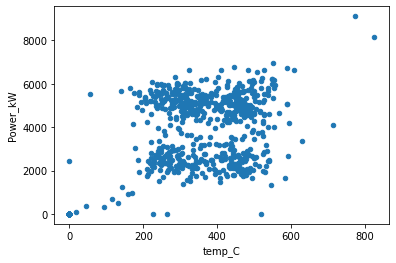

In [104]:
daily.plot(kind='scatter',x='temp_C',y='Power_kW')
plt.show()